In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
client = Client('SCEDC')
ot = UTCDateTime('2019-07-06 03:19:53')

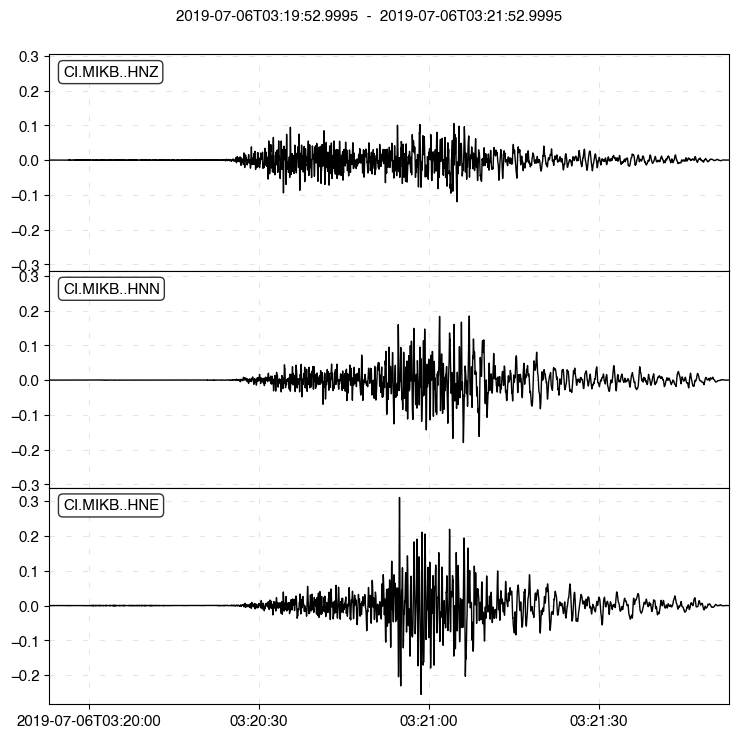

In [57]:
# sta = 'SRT'
sta = 'MIKB'

st = client.get_waveforms(network='CI', station=sta, location='*',
                          channel='HN?', starttime=ot, endtime=ot+2*60,
                          attach_response=True)
st.detrend('demean').detrend('linear').taper(0.05)
st.remove_sensitivity()
st.plot()

lps = np.logspace(-1, 1, 20)
pgas, pgvs = [], []

for lp in lps:
    nst = st.copy()
    nst.filter('lowpass', freq=lp)
    maxe = abs(nst.select(channel='HNE')[0].max())
    maxn = abs(nst.select(channel='HNN')[0].max())
    pgas.append(np.mean([maxe, maxn]))

    nst = st.copy()
    nst.integrate()
    nst.filter('lowpass', freq=lp)
    maxe = abs(nst.select(channel='HNE')[0].max())
    maxn = abs(nst.select(channel='HNN')[0].max())
    pgvs.append(np.mean([maxe, maxn]))

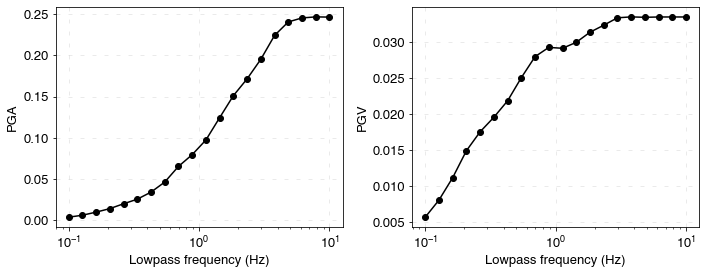

In [60]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(lps, pgas, '-ko')
plt.xlabel('Lowpass frequency (Hz)')
plt.ylabel('PGA')
plt.xscale('log')
plt.subplot(1, 2, 2)
plt.plot(lps, pgvs, '-ko')
plt.xlabel('Lowpass frequency (Hz)')
plt.ylabel('PGV')
plt.xscale('log')
plt.tight_layout()
plt.show()